# See astar graph exploration

In [1]:
from mfreight.Multimodal.merge_graphs import MergeNets
from mfreight.Multimodal.merge_graphs import MultimodalNet
import osmnx as ox

In [2]:
Net = MultimodalNet()
Net.set_taget_weight_to_graph(length_w=1, CO2_eq_kg_w=0, duration_w=0)
nodes, edges = ox.graph_to_gdfs(Net.G_multimodal_u)
edges.head(2)

,STATUS,trans_mode,length,duration_h,CO2_eq_kg,geometry,length_normalized,CO2_eq_kg_normalized,duration_h_normalized,taget_feature,...,DIRECTION,NET,TIMEZONE,IM_RT_TYPE,DS,TRKRGHTS2,TRKRGHTS3,u,v,key
0,1.0,road,498.0,0.004407,0.040095,"LINESTRING (-81.82870 27.89680, -81.82940 27.9...",0.003261,0.003605,0.000053,0.003261,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000005067,1000005073,0
1,1.0,road,987.0,0.008735,0.079466,"LINESTRING (-81.82870 27.89680, -81.82070 27.9...",0.006462,0.007144,0.000106,0.006462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000005067,1000005095,0


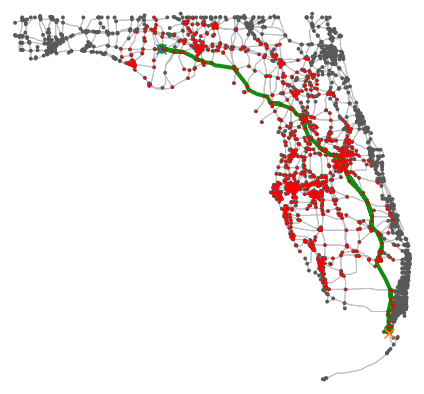

Distance 846.862 [km]


In [3]:
hwy_dest = (25.382380, -80.475159)
hwy_ori =(30.439440, -85.057166)
from geopy.distance import great_circle
def heuristic_func(u,v, G=Net.G_multimodal_u, dest= hwy_dest):
    return great_circle((G.nodes[u]['y'],G.nodes[u]['x']),hwy_dest).km * 1000
node_orig, node_dest, explored = Net.plot_astar_exploration(hwy_ori, hwy_dest,heuristic=heuristic_func,target_weight="length")